/home/aimlab/Documents/Courses/Artificial_Intelligence/HW/HW3/problem_2/Logistic_Regression.py:287: RuntimeWarning: overflow encountered in exp
  """
/home/aimlab/Documents/Courses/Artificial_Intelligence/HW/HW3/problem_2/Logistic_Regression.py:338: RuntimeWarning: divide by zero encountered in log
  
/home/aimlab/Documents/Courses/Artificial_Intelligence/HW/HW3/problem_2/Logistic_Regression.py:338: RuntimeWarning: invalid value encountered in multiply
  


Accuracy : 0.56
Sensitivity : 0.66
Specificity : 0.40
Precision : 0.65
NPV : 0.41
FNR : 0.34
FPR : 0.60
Rec : 0.66
fmeasure : 0.65


Accuracy : 0.56
Sensitivity : 0.66
Specificity : 0.40
Precision : 0.65
NPV : 0.41
FNR : 0.34
FPR : 0.60
Rec : 0.66
fmeasure : 0.65


Accuracy : 0.56
Sensitivity : 0.66
Specificity : 0.40
Precision : 0.65
NPV : 0.41
FNR : 0.34
FPR : 0.60
Rec : 0.66
fmeasure : 0.65


Accuracy : 0.56
Sensitivity : 0.66
Specificity : 0.40
Precision : 0.65
NPV : 0.41
FNR : 0.34
FPR : 0.60
Rec : 0.66
fmeasure : 0.65


Accuracy : 0.56
Sensitivity : 0.66
Specificity : 0.40
Precision : 0.65
NPV : 0.41
FNR : 0.34
FPR : 0.60
Rec : 0.66
fmeasure : 0.65


Accuracy : 0.56
Sensitivity : 0.66
Specificity : 0.40
Precision : 0.65
NPV : 0.41
FNR : 0.34
FPR : 0.60
Rec : 0.66
fmeasure : 0.65


Accuracy : 0.56
Sensitivity : 0.66
Specificity : 0.40
Precision : 0.65
NPV : 0.41
FNR : 0.34
FPR : 0.60
Rec : 0.66
fmeasure : 0.65


Accuracy : 0.56
Sensitivity : 0.66
Specificity : 0.40
Precision : 0.6

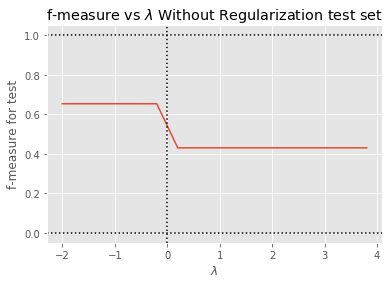

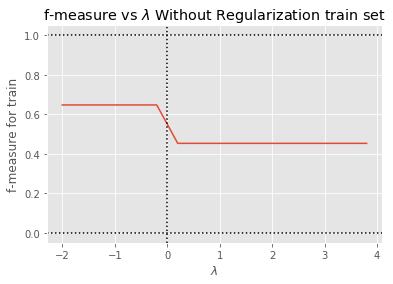

In [10]:
"""
Problem 2, Logistic Regression with Regularization

"""
import decimal
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from Logistic_Regression import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


def float_range(start, stop, step):  # Method for stepping the lambda value
    while start <= stop:
        yield start
        start = step + start


# Import Chronic Kidney Disease dataset
df = pd.read_csv(
    "chronic_kidney_disease_W_header_missing_category_replaced_and_given_value.csv")
# replacing the class values (ckd = 1, notckd = 0)
df = df.replace('ckd', 1)
df = df.replace('notckd', 0)

X = df.iloc[:, 0:24]  # features vectors
# class labels: ckd = Chronic Kidney Disease, notckd = Not Chronic Kidney Disease
y = df.iloc[:, 24]

# Replace missing feature values. 'median' is used for numerical cases and feature value
X = X.replace('?', np.nan)
X.to_csv('X_test_file.csv')
y.to_csv('Y_test_file.csv')
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(X)
X_imputed = imr.transform(X.values)


le = LabelEncoder()  # positive class = 1 (ckd), negative class = 0 (notckd)
y = le.fit_transform(y)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state=7)  # , random_state = 7

# Z-score normalization
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Principle component analysis (dimensionality reduction)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
f_measure_test = []
f_measure_train = []
Lambda = []

# Training logistic regression classifier with L2 penalty
for i in float_range(-2, -0.2, 0.2):

    C_ = 1/i
    LR = LogisticRegression(
        learningRate=0.1, numEpochs=10, penalty='L2', C=i)  # range from 0.01 - 0.03
    LR.train(X_train_pca, y_train, tol=10 ** -3)
    # LR.plotCost()
    # Testing fitted model on test data with cutoff probability 50%
    predictions, probs = LR.predict(X_test_pca, 0.5)
    performance = LR.performanceEval(predictions, y_test)
    # added
    predictions_train, probs_train = LR.predict(X_train_pca, 0.5)
    performance_train = LR.performanceEval(predictions_train, y_train)
    # LR.plotDecisionRegions(X_test_pca, y_test)
    # LR.predictionPlot(X_test_pca, y_test)

    # Print out performance values
    for key, value in performance.items():
        print('%s : %.2f' % (key, value))
    print("\n")
    f_measure_test.append(list(performance.values())[len(performance)-1])
    f_measure_train.append(list(performance_train.values())[
                           len(performance_train)-1])
    Lambda.append(i)
    # LR.plotDecisionRegions(X_test_pca, y_test)
    # LR.predictionPlot(X_test_pca, y_test)

    # Print out performance values
    for key, value in performance.items():
        print('%s : %.2f' % (key, value))
    print("\n")

for i in float_range(0.2, 4, 0.2):
    C_ = 1/i
    LR = LogisticRegression(
        learningRate=0.1, numEpochs=10, penalty='L2', C=i)  # range from 0.01 - 0.03
    LR.train(X_train_pca, y_train, tol=10 ** -3)
    # LR.plotCost()

    # Testing fitted model on test data with cutoff probability 50%
    predictions, probs = LR.predict(X_test_pca, 0.5)
    performance = LR.performanceEval(predictions, y_test)
    # added
    predictions_train, probs_train = LR.predict(X_train_pca, 0.5)
    performance_train = LR.performanceEval(predictions_train, y_train)
    # LR.plotDecisionRegions(X_test_pca, y_test)
    # LR.predictionPlot(X_test_pca, y_test)

    # Print out performance values
    for key, value in performance.items():
        print('%s : %.2f' % (key, value))
    print("\n")
    f_measure_test.append(list(performance.values())[len(performance)-1])
    f_measure_train.append(list(performance_train.values())[
                           len(performance_train)-1])
    Lambda.append(i)

plt.figure('Without Regularization test')
plt.plot(Lambda, f_measure_test)
plt.xlabel('$\lambda$')
# plt.ylim([-0.1, 1.1])
plt.axhline(0.0, ls='dotted', color='k')
plt.axhline(1.0, ls='dotted', color='k')
plt.axvline(0.0, ls='dotted', color='k')
plt.ylabel('f-measure for test')
plt.title('f-measure vs $\lambda$ Without Regularization test set')

""" for the train data"""

plt.figure('Without Regularization train')
plt.plot(Lambda, f_measure_train)
plt.xlabel('$\lambda$')
# plt.ylim([-0.1, 1.1])
plt.axhline(0.0, ls='dotted', color='k')
plt.axhline(1.0, ls='dotted', color='k')
plt.axvline(0.0, ls='dotted', color='k')
plt.ylabel('f-measure for train')
plt.title('f-measure vs $\lambda$ Without Regularization train set')
plt.show()



/home/aimlab/Documents/Courses/Artificial_Intelligence/HW/HW3/problem_2/Logistic_Regression.py:338: RuntimeWarning: divide by zero encountered in log
  
/home/aimlab/Documents/Courses/Artificial_Intelligence/HW/HW3/problem_2/Logistic_Regression.py:338: RuntimeWarning: invalid value encountered in multiply
  
/home/aimlab/Documents/Courses/Artificial_Intelligence/HW/HW3/problem_2/Logistic_Regression.py:287: RuntimeWarning: overflow encountered in exp
  """


Accuracy : 0.06
Sensitivity : 0.10
Specificity : 0.00
Precision : 0.14
NPV : 0.00
FNR : 0.90
FPR : 1.00
Rec : 0.10
fmeasure : 0.12


Accuracy : 0.06
Sensitivity : 0.10
Specificity : 0.00
Precision : 0.14
NPV : 0.00
FNR : 0.90
FPR : 1.00
Rec : 0.10
fmeasure : 0.12


Accuracy : 0.06
Sensitivity : 0.10
Specificity : 0.00
Precision : 0.14
NPV : 0.00
FNR : 0.90
FPR : 1.00
Rec : 0.10
fmeasure : 0.12


Accuracy : 0.06
Sensitivity : 0.10
Specificity : 0.00
Precision : 0.14
NPV : 0.00
FNR : 0.90
FPR : 1.00
Rec : 0.10
fmeasure : 0.12


Accuracy : 0.06
Sensitivity : 0.10
Specificity : 0.00
Precision : 0.14
NPV : 0.00
FNR : 0.90
FPR : 1.00
Rec : 0.10
fmeasure : 0.12


Accuracy : 0.06
Sensitivity : 0.10
Specificity : 0.00
Precision : 0.14
NPV : 0.00
FNR : 0.90
FPR : 1.00
Rec : 0.10
fmeasure : 0.12


Accuracy : 0.06
Sensitivity : 0.10
Specificity : 0.00
Precision : 0.14
NPV : 0.00
FNR : 0.90
FPR : 1.00
Rec : 0.10
fmeasure : 0.12


Accuracy : 0.06
Sensitivity : 0.10
Specificity : 0.00
Precision : 0.1

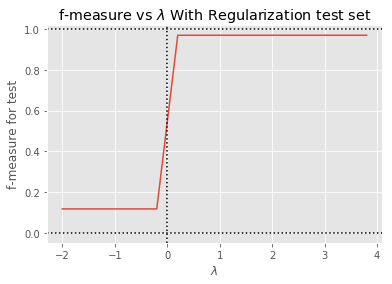

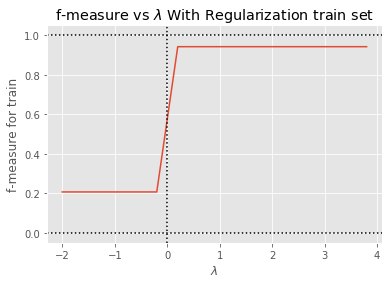

In [11]:
"""

#  part C of problem 2


"""
# Z-score normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principle component analysis (dimensionality reduction)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
j = 0
f_measure_test = []
f_measure_train = []
Lambda = []

# Training logistic regression classifier with L2 penalty
for i in float_range(-2, -0.2, 0.2):

    C_ = 1/i
    LR = LogisticRegression(
        learningRate=0.1, numEpochs=10, penalty='L2', C=i)  # range from 0.01 - 0.03
    LR.train(X_train_pca, y_train, tol=10 ** -3)
    # LR.plotCost()
    # Testing fitted model on test data with cutoff probability 50%
    predictions, probs = LR.predict(X_test_pca, 0.5)
    performance = LR.performanceEval(predictions, y_test)
    # added
    predictions_train, probs_train = LR.predict(X_train_pca, 0.5)
    performance_train = LR.performanceEval(predictions_train, y_train)
    # LR.plotDecisionRegions(X_test_pca, y_test)
    # LR.predictionPlot(X_test_pca, y_test)

    # Print out performance values
    for key, value in performance.items():
        print('%s : %.2f' % (key, value))
    print("\n")
    f_measure_test.append(list(performance.values())[len(performance)-1])
    f_measure_train.append(list(performance_train.values())[
                           len(performance_train)-1])
    Lambda.append(i)
    # LR.plotDecisionRegions(X_test_pca, y_test)
    # LR.predictionPlot(X_test_pca, y_test)

    # Print out performance values
    for key, value in performance.items():
        print('%s : %.2f' % (key, value))
    print("\n")

for i in float_range(0.2, 4, 0.2):

    C_ = 1/i
    LR = LogisticRegression(
        learningRate=0.1, numEpochs=10, penalty='L2', C=i)  # range from 0.01 - 0.03
    LR.train(X_train_pca, y_train, tol=10 ** -3)
    # LR.plotCost()

    # Testing fitted model on test data with cutoff probability 50%
    predictions, probs = LR.predict(X_test_pca, 0.5)
    performance = LR.performanceEval(predictions, y_test)
    # added
    predictions_train, probs_train = LR.predict(X_train_pca, 0.5)
    performance_train = LR.performanceEval(predictions_train, y_train)
    # LR.plotDecisionRegions(X_test_pca, y_test)
    # LR.predictionPlot(X_test_pca, y_test)

    # Print out performance values
    for key, value in performance.items():
        print('%s : %.2f' % (key, value))
    print("\n")
    f_measure_test.append(list(performance.values())[len(performance)-1])
    f_measure_train.append(list(performance_train.values())[
                           len(performance_train)-1])
    Lambda.append(i)

plt.figure('With Regularization test')
plt.plot(Lambda, f_measure_test)
plt.xlabel('$\lambda$')
# plt.ylim([-0.1, 1.1])
plt.axhline(0.0, ls='dotted', color='k')
plt.axhline(1.0, ls='dotted', color='k')
plt.axvline(0.0, ls='dotted', color='k')
plt.ylabel('f-measure for test')
plt.title('f-measure vs $\lambda$ With Regularization test set')

""" for the train data"""

plt.figure('With Regularization train set')
plt.plot(Lambda, f_measure_train)
plt.xlabel('$\lambda$')
# plt.ylim([-0.1, 1.1])
plt.axhline(0.0, ls='dotted', color='k')
plt.axhline(1.0, ls='dotted', color='k')
plt.axvline(0.0, ls='dotted', color='k')
plt.ylabel('f-measure for train')
plt.title('f-measure vs $\lambda$ With Regularization train set')
plt.show()



/home/aimlab/Documents/Courses/Artificial_Intelligence/HW/HW3/problem_2/Logistic_Regression.py:338: RuntimeWarning: divide by zero encountered in log
  
/home/aimlab/Documents/Courses/Artificial_Intelligence/HW/HW3/problem_2/Logistic_Regression.py:338: RuntimeWarning: invalid value encountered in multiply
  


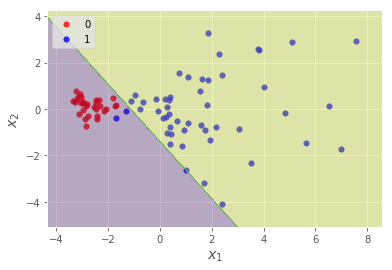

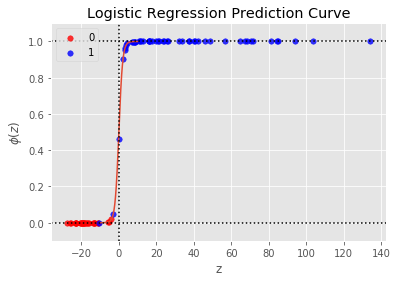

Accuracy : 0.97
Sensitivity : 0.98
Specificity : 0.97
Precision : 0.98
NPV : 0.97
FNR : 0.02
FPR : 0.03
Rec : 0.98
fmeasure : 0.98




In [12]:
""" 
Optional Section
"""
# The prediction and Decision Region plots for Lamda of 4
df = pd.read_csv(
    "chronic_kidney_disease_W_header_missing_category_replaced_and_given_value.csv")
# replacing the class values (ckd = 1, notckd = 0)
df = df.replace('ckd', 1)
df = df.replace('notckd', 0)

X = df.iloc[:, 0:24]  # features vectors
# class labels: ckd = Chronic Kidney Disease, notckd = Not Chronic Kidney Disease
y = df.iloc[:, 24]

# Replace missing feature values. 'median' is used for numerical cases and feature value
X = X.replace('?', np.nan)
imr = SimpleImputer(missing_values=np.nan, strategy='median')
imr = imr.fit(X)
X_imputed = imr.transform(X.values)


le = LabelEncoder()  # positive class = 1 (ckd), negative class = 0 (notckd)
y = le.fit_transform(y)

# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, random_state = 7)  # , random_state = 7

# Z-score normalization
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Principle component analysis (dimensionality reduction)
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
LR = LogisticRegression(learningRate=0.1, numEpochs=10,
                        penalty='L2', C=0.1)  # range from 0.01 - 0.03
LR.train(X_train_pca, y_train, tol=10 ** -3)
# LR.plotCost()
# Testing fitted model on test data with cutoff probability 50%
predictions, probs = LR.predict(X_test_pca, 0.01)
performance = LR.performanceEval(predictions, y_test)
LR.plotDecisionRegions(X_test_pca, y_test)
LR.predictionPlot(X_test_pca, y_test)
# Print out performance values
for key, value in performance.items():
    print('%s : %.2f' % (key, value))
print("\n")
